In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
logs_dir = "lstm/logs"

# Results of Random Forest 

In [11]:
# test data results of random forest
rf_df = pd.DataFrame()
rf_df['country'] = ['CA', 'CA', 'CA', 'CA', 'US', 'US', 'US', 'US']
rf_df['metrics'] = ['acc', 'precision', 'recall', 'f1', 'acc', 'precision', 'recall', 'f1'] 
rf_df['values'] = [0.4121, 0.7067, 0.3267, 0.3670,  
                     0.2910, 0.8303, 0.3618, 0.4776]
rf_df

,country,metrics,values
0,CA,acc,0.4121
1,CA,precision,0.7067
2,CA,recall,0.3267
3,CA,f1,0.3670
4,US,acc,0.2910
5,US,precision,0.8303
6,US,recall,0.3618
7,US,f1,0.4776


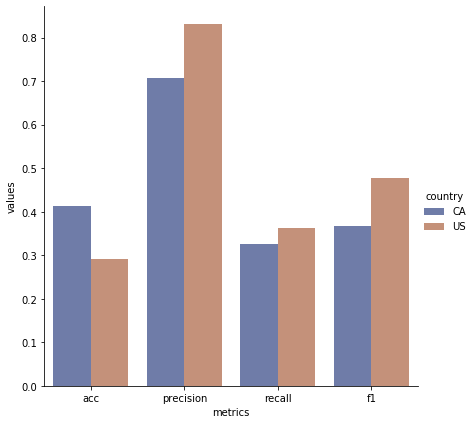

In [13]:
g = sns.catplot(
    data=rf_df, kind="bar",
    x='metrics', y="values", hue="country",
    ci="sd", palette="dark", alpha=.6, height=6
)

# LSTM Results 

## USA Models

### Logs of US models 

In [3]:
############## Naive LSTM ##############
usa_tr = pd.read_csv(logs_dir + '/imbalanced_usa/tr_log.csv')
usa_tr.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
usa_tr = usa_tr.drop('drop', 1)
usa_test = pd.read_csv(logs_dir + '/imbalanced_usa/test_log.csv')
usa_test.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
usa_test = usa_test.drop('drop', 1)
usa_tr['step'] = usa_tr['epoch'] * 1218 + usa_tr['batch'] - 1
usa_test['step'] = usa_test['epoch'] * 1218 + usa_test['batch'] - 1

In [4]:
############## LSTM with dropout 0.2 ##############
usa_tr_2 = pd.read_csv(logs_dir +'/im_usa_dropout_2/tr_log.csv')
usa_tr_2.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
usa_tr_2 = usa_tr_2.drop('drop', 1)
usa_test_2 = pd.read_csv(logs_dir +'/im_usa_dropout_2/test_log.csv')
usa_test_2.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
usa_test_2 = usa_test_2.drop('drop', 1)
usa_tr_2['step'] = usa_tr_2['epoch'] * 1218 + usa_tr_2['batch'] - 1
usa_test_2['step'] = usa_test_2['epoch'] * 1218 + usa_test_2['batch'] - 1

In [5]:
############## LSTM with dropout 0.4 ##############
usa_tr_4 = pd.read_csv(logs_dir +'/im_usa_dropout_4/tr_log.csv')
usa_tr_4.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
usa_tr_4 = usa_tr_4.drop('drop', 1)
usa_test_4 = pd.read_csv(logs_dir +'/im_usa_dropout_4/test_log.csv')
usa_test_4.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
usa_test_4 = usa_test_4.drop('drop', 1)
usa_tr_4['step'] = usa_tr_4['epoch'] * 1218 + usa_tr_4['batch'] - 1
usa_test_4['step'] = usa_test_4['epoch'] * 1218 + usa_test_4['batch'] - 1

### LOSS Comparisions (Code to generate US_loss.png)

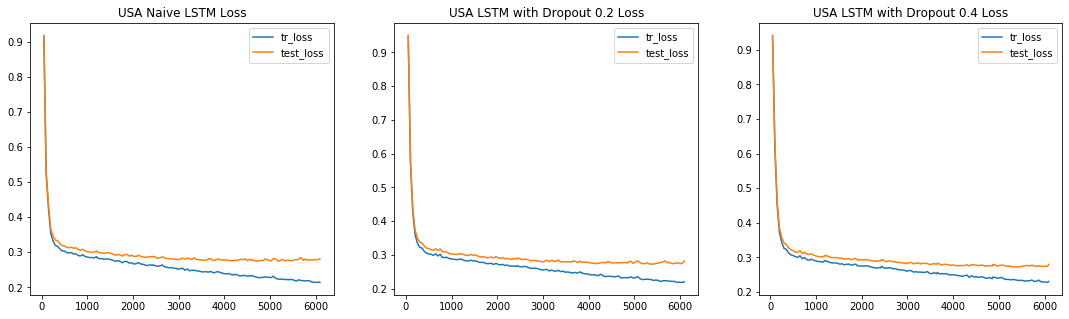

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
ax1.plot( 'step', 'loss', data=usa_tr, label='tr_loss')
ax1.plot( 'step', 'loss', data=usa_test, label="test_loss")
ax1.legend()
ax1.title.set_text('USA Naive LSTM Loss')

ax2.plot( 'step', 'loss', data=usa_tr_2, label='tr_loss')
ax2.plot( 'step', 'loss', data=usa_test_2, label='test_loss')
ax2.legend()
ax2.title.set_text('USA LSTM with Dropout 0.2 Loss')

ax3.plot( 'step', 'loss', data=usa_tr_4, label='tr_loss')
ax3.plot( 'step', 'loss', data=usa_test_4, label='test_loss')
ax3.legend()
ax3.title.set_text('USA LSTM with Dropout 0.4 Loss')

In [65]:
n_dropout = [0.0, 0.2, 0.4]

results = pd.DataFrame()
results[str(0.0)] = usa_tr['loss']
results[str(0.2)] = usa_tr_2['loss']
results[str(0.4)] = usa_tr_4['loss']


print(results.describe())

# results.boxplot()

              0.0         0.2         0.4
count  129.000000  129.000000  129.000000
mean     0.263481    0.267576    0.273112
std      0.070021    0.073249    0.073640
min      0.213886    0.218589    0.227440
25%      0.231609    0.236003    0.243165
50%      0.252007    0.255138    0.259754
75%      0.276550    0.280049    0.280627
max      0.914215    0.947090    0.940192


In [66]:
n_dropout = [0.0, 0.2, 0.4]

results = pd.DataFrame()
results[str(0.0)] = usa_test['loss']
results[str(0.2)] = usa_test_2['loss']
results[str(0.4)] = usa_test_4['loss']


print(results.describe())
# results.boxplot()

              0.0         0.2         0.4
count  129.000000  129.000000  129.000000
mean     0.296174    0.297479    0.298383
std      0.062513    0.066711    0.068523
min      0.273810    0.272561    0.272330
25%      0.278433    0.277627    0.276692
50%      0.281496    0.282276    0.283377
75%      0.294435    0.296974    0.297296
max      0.917898    0.950420    0.941926


### Acc, Preicsion, Recall and F1 Comparisions  (Code to generate US_LSTMNaive/0.2/0.4_Metrics.png)

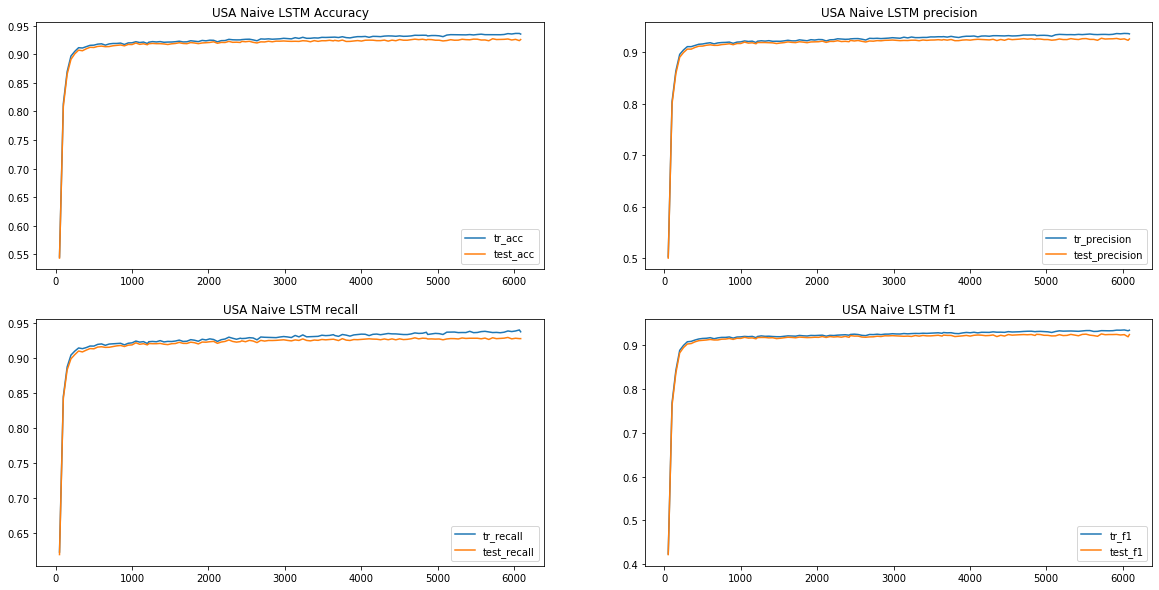

In [14]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

axs[0,0].plot(usa_tr['step'], usa_tr['acc'], label='tr_acc')
axs[0,0].plot(usa_test['step'], usa_test['acc'], label='test_acc')
axs[0,0].legend()
axs[0,0].title.set_text('USA Naive LSTM Accuracy')

axs[0,1].plot(usa_tr['step'], usa_tr['precision'], label='tr_precision')
axs[0,1].plot(usa_test['step'], usa_test['precision'], label='test_precision')
axs[0,1].legend()
axs[0,1].title.set_text('USA Naive LSTM precision')

axs[1,0].plot(usa_tr['step'], usa_tr['recall'], label='tr_recall')
axs[1,0].plot(usa_test['step'], usa_test['recall'], label='test_recall')
axs[1,0].legend()
axs[1,0].title.set_text('USA Naive LSTM recall')

axs[1,1].plot(usa_tr['step'], usa_tr['f1'], label='tr_f1')
axs[1,1].plot(usa_test['step'], usa_test['f1'], label='test_f1')
axs[1,1].legend()
axs[1,1].title.set_text('USA Naive LSTM f1')

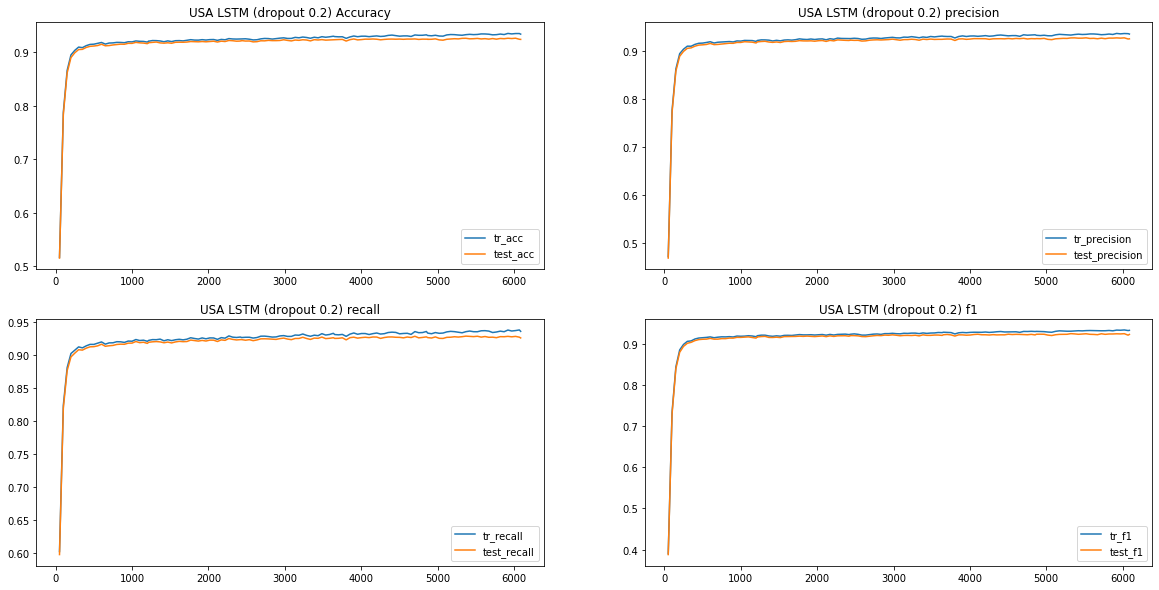

In [6]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

axs[0,0].plot(usa_tr_2['step'], usa_tr_2['acc'], label='tr_acc')
axs[0,0].plot(usa_test_2['step'], usa_test_2['acc'], label='test_acc')
axs[0,0].legend()
axs[0,0].title.set_text('USA LSTM (dropout 0.2) Accuracy')

axs[0,1].plot(usa_tr_2['step'], usa_tr_2['precision'], label='tr_precision')
axs[0,1].plot(usa_test_2['step'], usa_test_2['precision'], label='test_precision')
axs[0,1].legend()
axs[0,1].title.set_text('USA LSTM (dropout 0.2) precision')

axs[1,0].plot(usa_tr_2['step'], usa_tr_2['recall'], label='tr_recall')
axs[1,0].plot(usa_test_2['step'], usa_test_2['recall'], label='test_recall')
axs[1,0].legend()
axs[1,0].title.set_text('USA LSTM (dropout 0.2) recall')

axs[1,1].plot(usa_tr_2['step'], usa_tr_2['f1'], label='tr_f1')
axs[1,1].plot(usa_test_2['step'], usa_test_2['f1'], label='test_f1')
axs[1,1].legend()
axs[1,1].title.set_text('USA LSTM (dropout 0.2) f1')

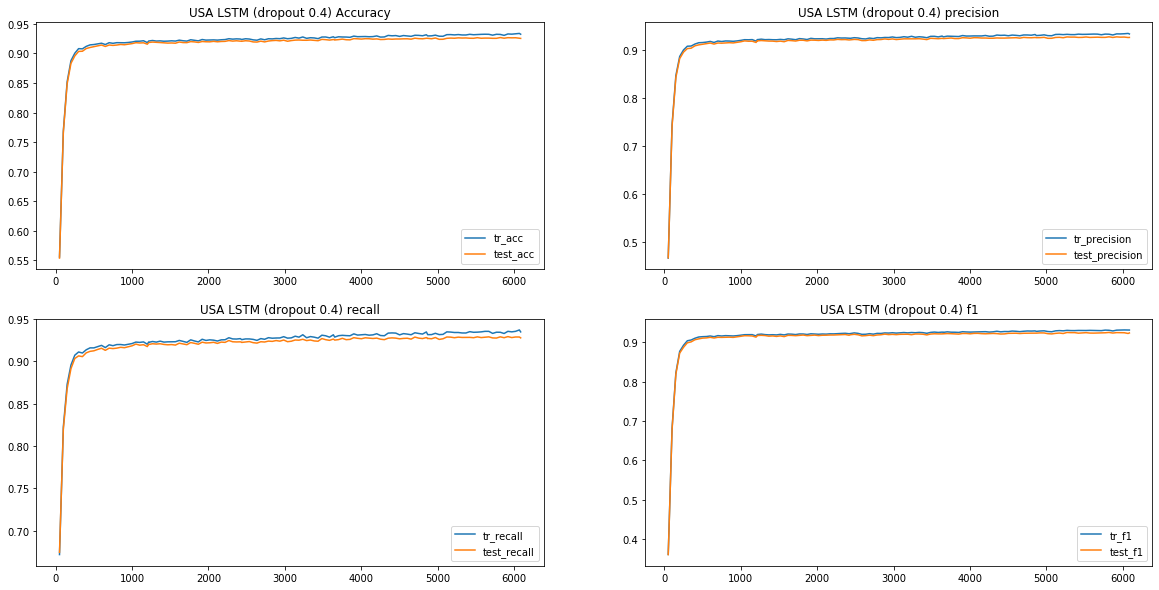

In [8]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

axs[0,0].plot(usa_tr_4['step'], usa_tr_4['acc'], label='tr_acc')
axs[0,0].plot(usa_test_4['step'], usa_test_4['acc'], label='test_acc')
axs[0,0].legend()
axs[0,0].title.set_text('USA LSTM (dropout 0.4) Accuracy')

axs[0,1].plot(usa_tr_4['step'], usa_tr_4['precision'], label='tr_precision')
axs[0,1].plot(usa_test_4['step'], usa_test_4['precision'], label='test_precision')
axs[0,1].legend()
axs[0,1].title.set_text('USA LSTM (dropout 0.4) precision')

axs[1,0].plot(usa_tr_4['step'], usa_tr_4['recall'], label='tr_recall')
axs[1,0].plot(usa_test_4['step'], usa_test_4['recall'], label='test_recall')
axs[1,0].legend()
axs[1,0].title.set_text('USA LSTM (dropout 0.4) recall')

axs[1,1].plot(usa_tr_4['step'], usa_tr_4['f1'], label='tr_f1')
axs[1,1].plot(usa_test_4['step'], usa_test_4['f1'], label='test_f1')
axs[1,1].legend()
axs[1,1].title.set_text('USA LSTM (dropout 0.4) f1')

### Test Data Resultes of last step (code to generate US_lastStep_Metrics.png)

In [128]:
# test data results of random forest
usa = pd.DataFrame()
usa['models'] = ['LSTM', 'LSTM2', 'LSTM4']
usa['acc'] = [usa_test.iloc[-1]['acc'], usa_test_2.iloc[-1]['acc'], usa_test_4.iloc[-1]['acc']] 
usa['precision'] = [usa_test.iloc[-1]['precision'], usa_test_2.iloc[-1]['precision'], usa_test_4.iloc[-1]['precision']] 
usa['recall'] = [usa_test.iloc[-1]['recall'], usa_test_2.iloc[-1]['recall'], usa_test_4.iloc[-1]['recall']]
usa['f1'] = [usa_test.iloc[-1]['f1'], usa_test_2.iloc[-1]['f1'], usa_test_4.iloc[-1]['f1']]

usa

,models,acc,precision,recall,f1
0,LSTM,92.5710,92.5583,92.7486,92.3749
1,LSTM2,92.4402,92.4405,92.6147,92.2724
2,LSTM4,92.5608,92.5674,92.7454,92.3954


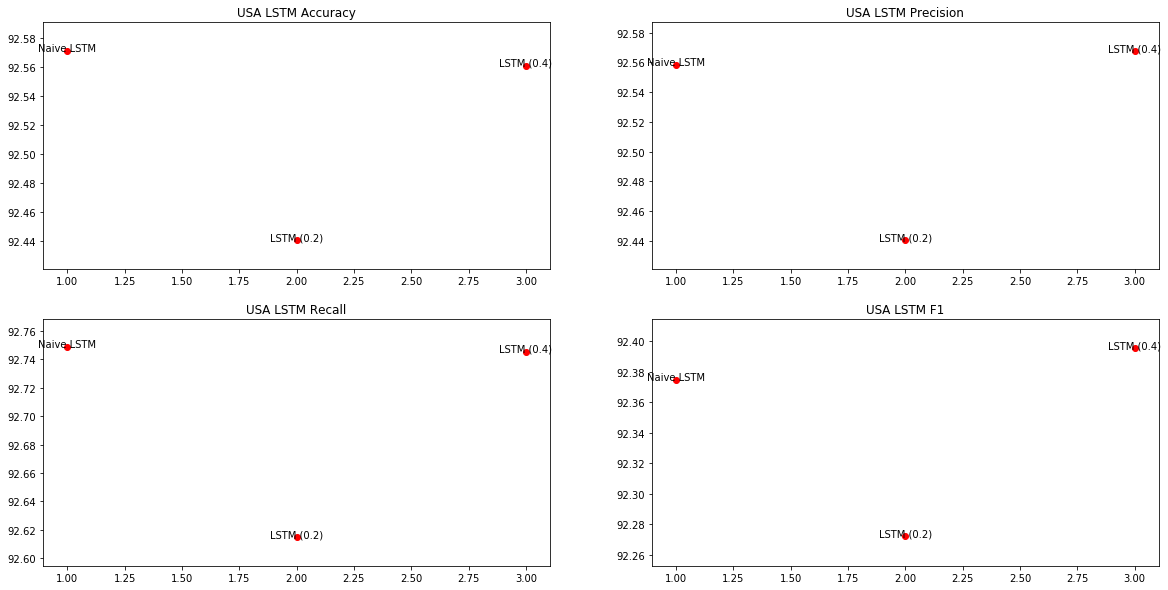

In [165]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

accs = usa['acc'].values.tolist()
axs[0,0].scatter([1,2,3], accs, color='r')
axs[0,0].text(1,accs[0],'Naive LSTM', horizontalalignment='center')
axs[0,0].text(2,accs[1],'LSTM (0.2)', horizontalalignment='center')
axs[0,0].text(3,accs[2],'LSTM (0.4)', horizontalalignment='center')
axs[0,0].title.set_text('USA LSTM Accuracy')

precisions = usa['precision'].values.tolist()
axs[0,1].scatter([1,2,3], precisions, color='r')
axs[0,1].text(1,precisions[0],'Naive LSTM', horizontalalignment='center')
axs[0,1].text(2,precisions[1],'LSTM (0.2)', horizontalalignment='center')
axs[0,1].text(3,precisions[2],'LSTM (0.4)', horizontalalignment='center')
axs[0,1].title.set_text('USA LSTM Precision')

recalls = usa['recall'].values.tolist()
axs[1,0].scatter([1,2,3], recalls, color='r')
axs[1,0].text(1,recalls[0],'Naive LSTM', horizontalalignment='center')
axs[1,0].text(2,recalls[1],'LSTM (0.2)', horizontalalignment='center')
axs[1,0].text(3,recalls[2],'LSTM (0.4)', horizontalalignment='center')
axs[1,0].title.set_text('USA LSTM Recall')

f1s = usa['f1'].values.tolist()
axs[1,1].scatter([1,2,3], f1s, color='r')
axs[1,1].text(1,f1s[0],'Naive LSTM', horizontalalignment='center')
axs[1,1].text(2,f1s[1],'LSTM (0.2)', horizontalalignment='center')
axs[1,1].text(3,f1s[2],'LSTM (0.4)', horizontalalignment='center')
axs[1,1].title.set_text('USA LSTM F1')

## CA Models

### Logs of CA models 

In [10]:
ca_tr = pd.read_csv(logs_dir +'/imbalanced_ca/tr_log.csv')
ca_tr.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
ca_tr = ca_tr.drop('drop', 1)
ca_test = pd.read_csv(logs_dir +'/imbalanced_ca/test_log.csv')
ca_test.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
ca_test = ca_test.drop('drop', 1)
ca_tr['step'] = ca_tr['epoch'] * 1218 + ca_tr['batch'] - 1
ca_test['step'] = ca_test['epoch'] * 1218 + ca_test['batch'] - 1

In [11]:
ca_tr_2 = pd.read_csv(logs_dir +'/im_ca_dropout_2/tr_log.csv')
ca_tr_2.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
ca_tr_2 = ca_tr_2.drop('drop', 1)
ca_test_2 = pd.read_csv(logs_dir +'/im_ca_dropout_2/test_log.csv')
ca_test_2.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
ca_test_2 = ca_test_2.drop('drop', 1)
ca_tr_2['step'] = ca_tr_2['epoch'] * 1218 + ca_tr_2['batch'] - 1
ca_test_2['step'] = ca_test_2['epoch'] * 1218 + ca_test_2['batch'] - 1

In [12]:
ca_tr_4 = pd.read_csv(logs_dir +'/im_ca_dropout_4/tr_log.csv')
ca_tr_4.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
ca_tr_4 = ca_tr_4.drop('drop', 1)
ca_test_4 = pd.read_csv(logs_dir +'/im_ca_dropout_4/test_log.csv')
ca_test_4.columns = ['epoch', 'batch', 'loss', 'acc', 'recall', 'precision', 'f1', 'drop']
ca_test_4 = ca_test_4.drop('drop', 1)
ca_tr_4['step'] = ca_tr_4['epoch'] * 1218 + ca_tr_4['batch'] - 1
ca_test_4['step'] = ca_test_4['epoch'] * 1218 + ca_test_4['batch'] - 1

### Loss Comparisions (Code to generate CA_loss.png)

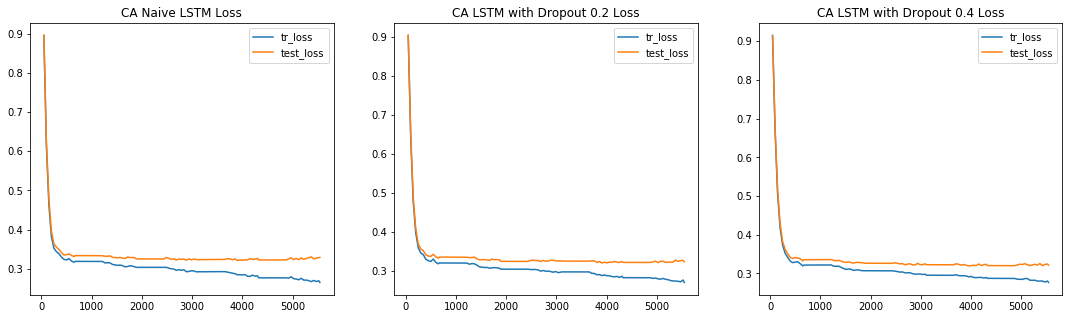

In [187]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
ax1.plot( 'step', 'loss', data=ca_tr, label='tr_loss')
ax1.plot( 'step', 'loss', data=ca_test, label="test_loss")
ax1.legend()
ax1.title.set_text('CA Naive LSTM Loss')

ax2.plot( 'step', 'loss', data=ca_tr_2, label='tr_loss')
ax2.plot( 'step', 'loss', data=ca_test_2, label='test_loss')
ax2.legend()
ax2.title.set_text('CA LSTM with Dropout 0.2 Loss')

ax3.plot( 'step', 'loss', data=ca_tr_4, label='tr_loss')
ax3.plot( 'step', 'loss', data=ca_test_4, label='test_loss')
ax3.legend()
ax3.title.set_text('CA LSTM with Dropout 0.4 Loss')

In [188]:
n_dropout = [0.0, 0.2, 0.4]

results = pd.DataFrame()
results[str(0.0)] = ca_tr['loss']
results[str(0.2)] = ca_tr_2['loss']
results[str(0.4)] = ca_tr_4['loss']


print(results.describe())

# results.boxplot()

             0.0        0.2        0.4
count  74.000000  74.000000  74.000000
mean    0.312223   0.315409   0.319967
std     0.083107   0.085143   0.088034
min     0.265134   0.269662   0.276759
25%     0.281358   0.284988   0.289545
50%     0.296187   0.298567   0.300509
75%     0.310724   0.313047   0.314814
max     0.895790   0.904546   0.915167


In [189]:
n_dropout = [0.0, 0.2, 0.4]

results = pd.DataFrame()
results[str(0.0)] = ca_test['loss']
results[str(0.2)] = ca_test_2['loss']
results[str(0.4)] = ca_test_4['loss']


print(results.describe())

# results.boxplot()

             0.0        0.2        0.4
count  74.000000  74.000000  74.000000
mean    0.342908   0.343159   0.344372
std     0.076357   0.079073   0.082695
min     0.321154   0.319721   0.319391
25%     0.324178   0.323542   0.322335
50%     0.326518   0.325948   0.325034
75%     0.330334   0.330386   0.331097
max     0.895941   0.904339   0.913985


### Acc, Preicsion, Recall and F1 Comparisions (Code to genderate CA_LSTMNaive/0.2/0.4_Metrics.png)

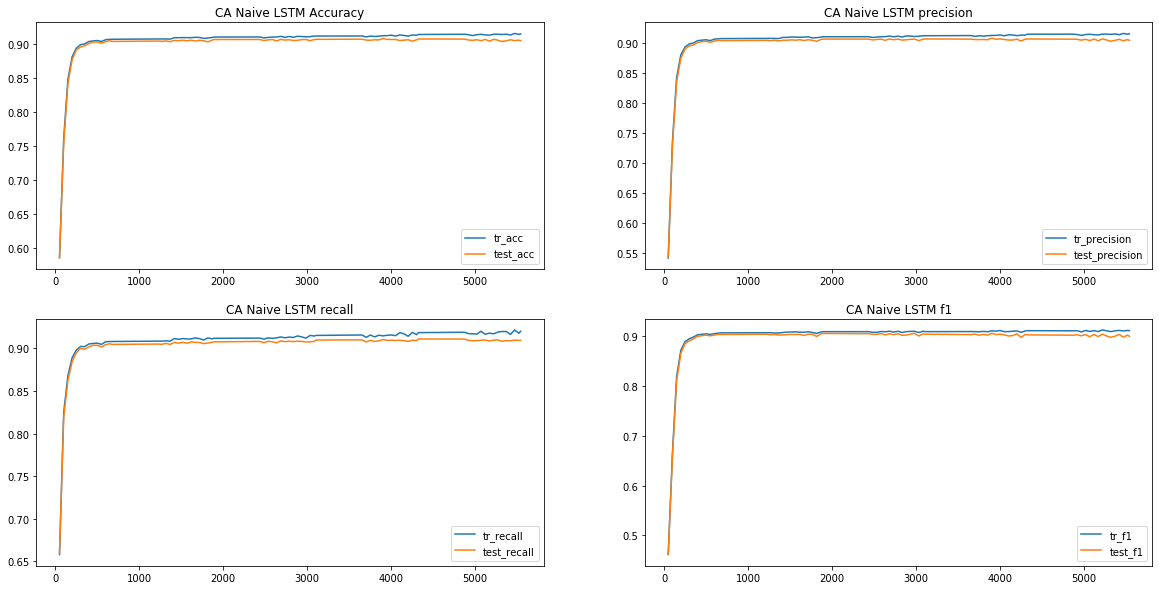

In [21]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

axs[0,0].plot(ca_tr['step'], ca_tr['acc'], label='tr_acc')
axs[0,0].plot(ca_test['step'], ca_test['acc'], label='test_acc')
axs[0,0].legend()
axs[0,0].title.set_text('CA Naive LSTM Accuracy')

axs[0,1].plot(ca_tr['step'], ca_tr['precision'], label='tr_precision')
axs[0,1].plot(ca_test['step'], ca_test['precision'], label='test_precision')
axs[0,1].legend()
axs[0,1].title.set_text('CA Naive LSTM precision')

axs[1,0].plot(ca_tr['step'], ca_tr['recall'], label='tr_recall')
axs[1,0].plot(ca_test['step'], ca_test['recall'], label='test_recall')
axs[1,0].legend()
axs[1,0].title.set_text('CA Naive LSTM recall')

axs[1,1].plot(ca_tr['step'], ca_tr['f1'], label='tr_f1')
axs[1,1].plot(ca_test['step'], ca_test['f1'], label='test_f1')
axs[1,1].legend()
axs[1,1].title.set_text('CA Naive LSTM f1')

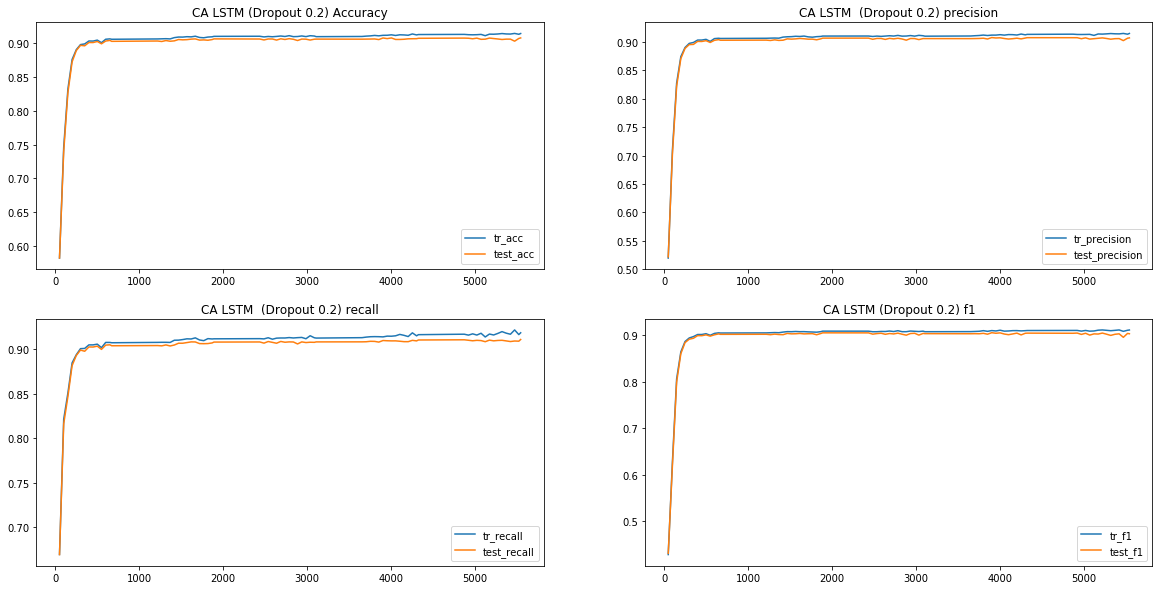

In [18]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

axs[0,0].plot(ca_tr_2['step'], ca_tr_2['acc'], label='tr_acc')
axs[0,0].plot(ca_test_2['step'], ca_test_2['acc'], label='test_acc')
axs[0,0].legend()
axs[0,0].title.set_text('CA LSTM (Dropout 0.2) Accuracy')

axs[0,1].plot(ca_tr_2['step'], ca_tr_2['precision'], label='tr_precision')
axs[0,1].plot(ca_test_2['step'], ca_test_2['precision'], label='test_precision')
axs[0,1].legend()
axs[0,1].title.set_text('CA LSTM  (Dropout 0.2) precision')

axs[1,0].plot(ca_tr_2['step'], ca_tr_2['recall'], label='tr_recall')
axs[1,0].plot(ca_test_2['step'], ca_test_2['recall'], label='test_recall')
axs[1,0].legend()
axs[1,0].title.set_text('CA LSTM  (Dropout 0.2) recall')

axs[1,1].plot(ca_tr_2['step'], ca_tr_2['f1'], label='tr_f1')
axs[1,1].plot(ca_test_2['step'], ca_test_2['f1'], label='test_f1')
axs[1,1].legend()
axs[1,1].title.set_text('CA LSTM (Dropout 0.2) f1')

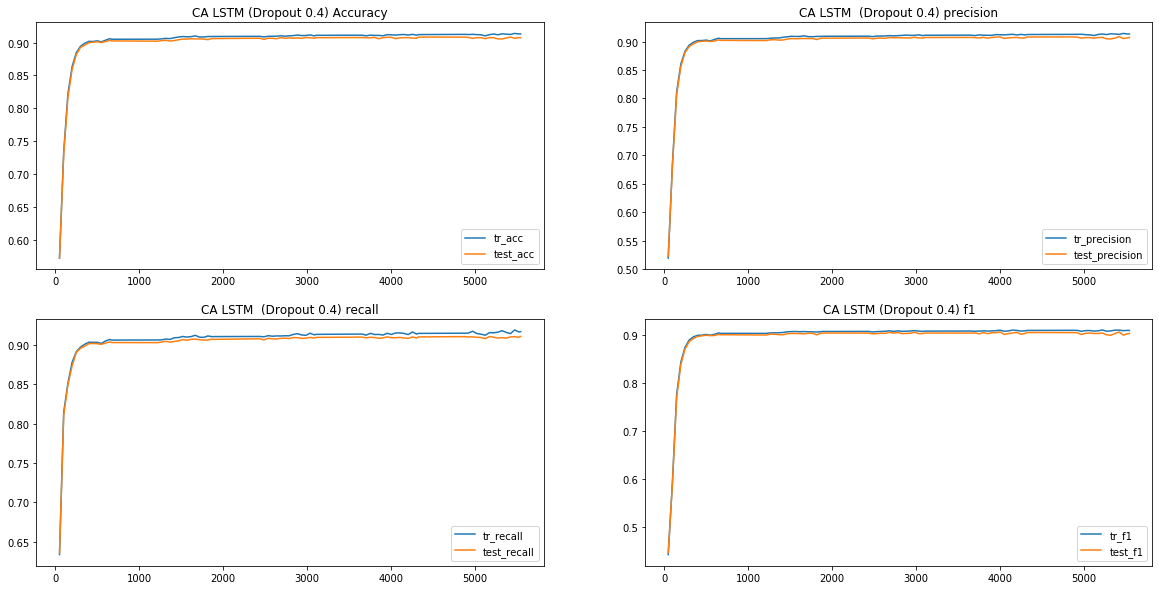

In [20]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

axs[0,0].plot(ca_tr_4['step'], ca_tr_4['acc'], label='tr_acc')
axs[0,0].plot(ca_test_4['step'], ca_test_4['acc'], label='test_acc')
axs[0,0].legend()
axs[0,0].title.set_text('CA LSTM (Dropout 0.4) Accuracy')

axs[0,1].plot(ca_tr_4['step'], ca_tr_4['precision'], label='tr_precision')
axs[0,1].plot(ca_test_4['step'], ca_test_4['precision'], label='test_precision')
axs[0,1].legend()
axs[0,1].title.set_text('CA LSTM  (Dropout 0.4) precision')

axs[1,0].plot(ca_tr_4['step'], ca_tr_4['recall'], label='tr_recall')
axs[1,0].plot(ca_test_4['step'], ca_test_4['recall'], label='test_recall')
axs[1,0].legend()
axs[1,0].title.set_text('CA LSTM  (Dropout 0.4) recall')

axs[1,1].plot(ca_tr_4['step'], ca_tr_4['f1'], label='tr_f1')
axs[1,1].plot(ca_test_4['step'], ca_test_4['f1'], label='test_f1')
axs[1,1].legend()
axs[1,1].title.set_text('CA LSTM (Dropout 0.4) f1')

### Test Data Resultes of last step (Code to generate CA_lastStep_Metrics.png)

In [193]:
# test data results of random forest
ca = pd.DataFrame()
ca['models'] = ['LSTM', 'LSTM2', 'LSTM4']
ca['acc'] = [ca_test.iloc[-1]['acc'], ca_test_2.iloc[-1]['acc'], ca_test_4.iloc[-1]['acc']] 
ca['precision'] = [ca_test.iloc[-1]['precision'],
                   ca_test_2.iloc[-1]['precision'], 
                   ca_test_4.iloc[-1]['precision']] 
ca['recall'] = [ca_test.iloc[-1]['recall'], 
                ca_test_2.iloc[-1]['recall'], 
                ca_test_4.iloc[-1]['recall']]
ca['f1'] = [ca_test.iloc[-1]['f1'],
            ca_test_2.iloc[-1]['f1'],
            ca_test_4.iloc[-1]['f1']]

ca

,models,acc,precision,recall,f1
0,LSTM,0.904886,0.904237,0.909477,0.899203
1,LSTM2,0.907994,0.907095,0.910911,0.903422
2,LSTM4,0.907484,0.907229,0.910906,0.903700


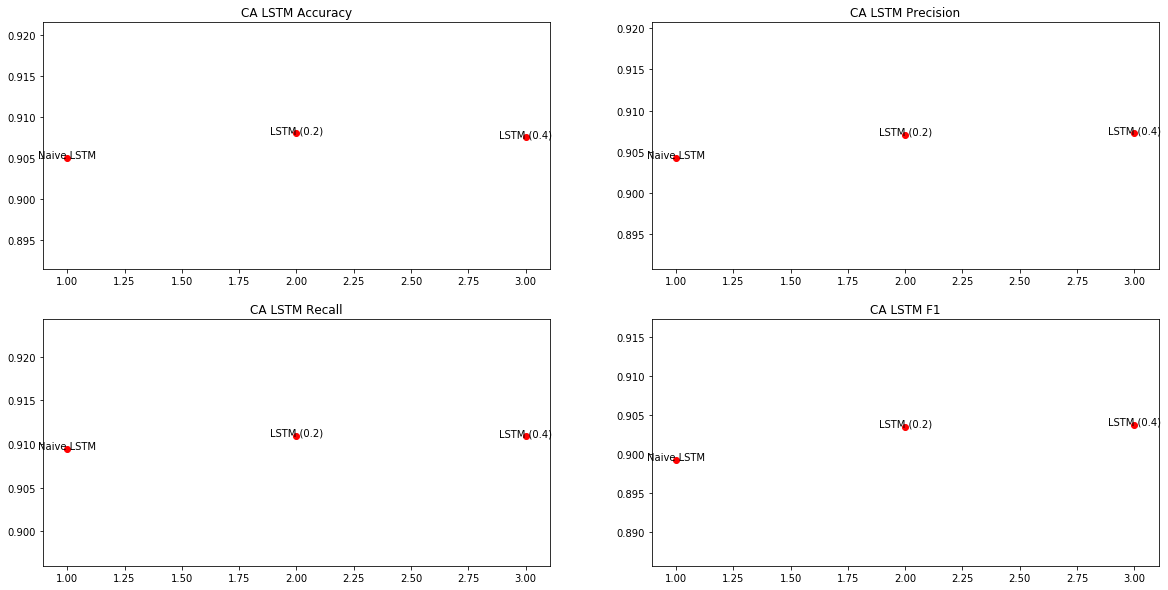

In [194]:
fig, axs = plt.subplots(2,2)
fig = plt.gcf()
fig.set_size_inches(20, 10)

accs = ca['acc'].values.tolist()
axs[0,0].scatter([1,2,3], accs, color='r')
axs[0,0].text(1,accs[0],'Naive LSTM', horizontalalignment='center')
axs[0,0].text(2,accs[1],'LSTM (0.2)', horizontalalignment='center')
axs[0,0].text(3,accs[2],'LSTM (0.4)', horizontalalignment='center')
axs[0,0].title.set_text('CA LSTM Accuracy')

precisions = ca['precision'].values.tolist()
axs[0,1].scatter([1,2,3], precisions, color='r')
axs[0,1].text(1,precisions[0],'Naive LSTM', horizontalalignment='center')
axs[0,1].text(2,precisions[1],'LSTM (0.2)', horizontalalignment='center')
axs[0,1].text(3,precisions[2],'LSTM (0.4)', horizontalalignment='center')
axs[0,1].title.set_text('CA LSTM Precision')

recalls = ca['recall'].values.tolist()
axs[1,0].scatter([1,2,3], recalls, color='r')
axs[1,0].text(1,recalls[0],'Naive LSTM', horizontalalignment='center')
axs[1,0].text(2,recalls[1],'LSTM (0.2)', horizontalalignment='center')
axs[1,0].text(3,recalls[2],'LSTM (0.4)', horizontalalignment='center')
axs[1,0].title.set_text('CA LSTM Recall')

f1s = ca['f1'].values.tolist()
axs[1,1].scatter([1,2,3], f1s, color='r')
axs[1,1].text(1,f1s[0],'Naive LSTM', horizontalalignment='center')
axs[1,1].text(2,f1s[1],'LSTM (0.2)', horizontalalignment='center')
axs[1,1].text(3,f1s[2],'LSTM (0.4)', horizontalalignment='center')
axs[1,1].title.set_text('CA LSTM F1')

### Best Models of US and CA (code to generate best_US_CA_Loss.png)

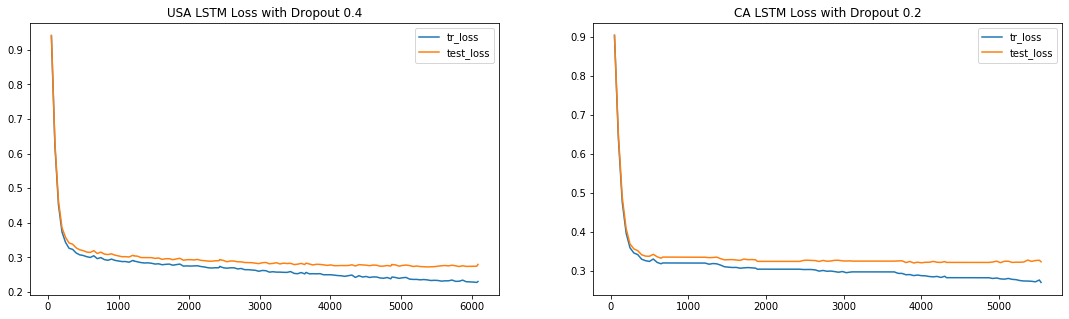

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
ax1.plot( 'step', 'loss', data=usa_tr_4, label='tr_loss')
ax1.plot( 'step', 'loss', data=usa_test_4, label="test_loss")
ax1.legend()
ax1.title.set_text('USA LSTM Loss with Dropout 0.4')

ax2.plot( 'step', 'loss', data=ca_tr_2, label='tr_loss')
ax2.plot( 'step', 'loss', data=ca_test_2, label='test_loss')
ax2.legend()
ax2.title.set_text('CA LSTM Loss with Dropout 0.2')